<a href="https://colab.research.google.com/github/Manvithtech07/Bangalore-House-Price-Predictor/blob/main/Bangalore_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data loading and initial exploration

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for column in data.columns:
  print(data[column].value_counts())
  print("-"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
--------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
--------------------
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64
--------------------
siz

In [7]:
data.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


2. Data cleaning and Pre-Processing

In [8]:
data.drop(columns=['area_type', 'availability', 'society', 'balcony'], inplace=True)
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
data['location'] = data['location'].fillna('Sarjapur Road')
data['size'] = data['size'].fillna('2 BHK')
data['bath'] = data['bath'].fillna(data['bath'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


3. Feature Engineering

In [11]:
data['bhk'] = data['size'].str.split().str.get(0).astype(int)
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
def convert_range(x):
    if isinstance(x, str):
        temp = x.split('-')
        if len(temp) == 2:
            return (float(temp[0]) + float(temp[1])) / 2
        try:
            return float(x)
        except:
            return None
    return x

data['total_sqft'] = data['total_sqft'].apply(convert_range)
data.dropna(subset=['total_sqft'], inplace=True)

In [14]:
data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [15]:
location_counts = data['location'].value_counts()
locations_less_than_10 = location_counts[location_counts <= 10].index
data['location'] = data['location'].apply(lambda x: 'other' if x in locations_less_than_10 else x)

print(f"Number of unique locations reduced to: {data['location'].nunique()}")

Number of unique locations reduced to: 241


In [16]:
data['location'].value_counts()

,count
location,
other,2892
Whitefield,538
Sarjapur Road,399
Electronic City,302
Kanakpura Road,271
...,...
2nd Phase Judicial Layout,11
Marsur,11
Bommenahalli,11


In [17]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13274.000000,13274.000000,13274.000000,1.327400e+04
mean,1559.626694,2.687359,112.453654,2.801718,7.907501e+03
std,1238.405258,1.336158,149.070368,1.291591,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [18]:
def remove_outliers_sqft(df_in):
    df_out = pd.DataFrame()
    for key, subdf in df_in.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, gen_df], ignore_index=True)
    return df_out

data = remove_outliers_sqft(data)
print("Outliers removed based on price_per_sqft.")

Outliers removed based on price_per_sqft.


In [19]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000
mean,1537.808470,2.605444,105.231407,2.719628,6305.040962
std,1145.476751,1.208370,138.461704,1.153699,3637.224906
min,250.000000,1.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,50.000000,2.000000,4285.714286
50%,1280.000000,2.000000,70.000000,3.000000,5314.009662
75%,1660.000000,3.000000,110.000000,3.000000,6853.176014
max,52272.000000,27.000000,3600.000000,27.000000,53150.000000


In [20]:
def bhk_outlier_remover(df_in):
    exclude_indices = np.array([])
    for location, location_df in df_in.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {'mean': np.mean(bhk_df.price_per_sqft), 'count': bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df_in.drop(exclude_indices, axis='index')

data = bhk_outlier_remover(data)
print("Outliers removed based on BHK.")

Outliers removed based on BHK.


In [21]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,8049.000000,8049.000000,8049.000000,8049.000000,8049.000000
mean,1517.307548,2.586657,117.390533,2.648900,6970.219302
std,907.516575,1.244062,156.289840,1.184716,4035.516624
min,250.000000,1.000000,8.000000,1.000000,1300.000000
25%,1080.000000,2.000000,51.000000,2.000000,4676.666667
50%,1255.000000,2.000000,76.300000,2.000000,5894.627021
75%,1691.000000,3.000000,125.000000,3.000000,7500.000000
max,12000.000000,27.000000,3600.000000,27.000000,53150.000000


In [22]:
data = data[data.bath < data.bhk + 2]
data.drop(columns=['size', 'price_per_sqft'], inplace=True)

print("Final dataset shape for modeling:", data.shape)
data.head()

Final dataset shape for modeling: (7947, 5)


,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [23]:
data

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2
...,...,...,...,...,...
11490,other,1400.0,7.0,218.0,7
11493,other,1353.0,2.0,110.0,2
11494,other,812.0,1.0,26.0,1
11497,other,1200.0,5.0,325.0,4


In [24]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split complete. Training set has {X_train.shape[0]} samples.")

Data split complete. Training set has 6357 samples.


In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import xgboost as xgb

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['location']),
    remainder='passthrough'
)

pipeline = make_pipeline(
    preprocessor,
    StandardScaler(),
    xgb.XGBRegressor(objective='reg:squarederror')
)

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'xgbregressor__n_estimators': [100, 200],
    'xgbregressor__learning_rate': [0.05, 0.1],
    'xgbregressor__max_depth': [3, 5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['location'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     cols...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbregressor__learning_rate': [0.05, 0.1],
                         'xgbregressor__max_depth': [3, 5],
                         'xgbregressor__n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Model Evaluation")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nR-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f} Lakhs")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} Lakhs")

Model Evaluation

R-squared (R²): 0.8152
Mean Absolute Error (MAE): 26.75 Lakhs
Root Mean Squared Error (RMSE): 69.87 Lakhs


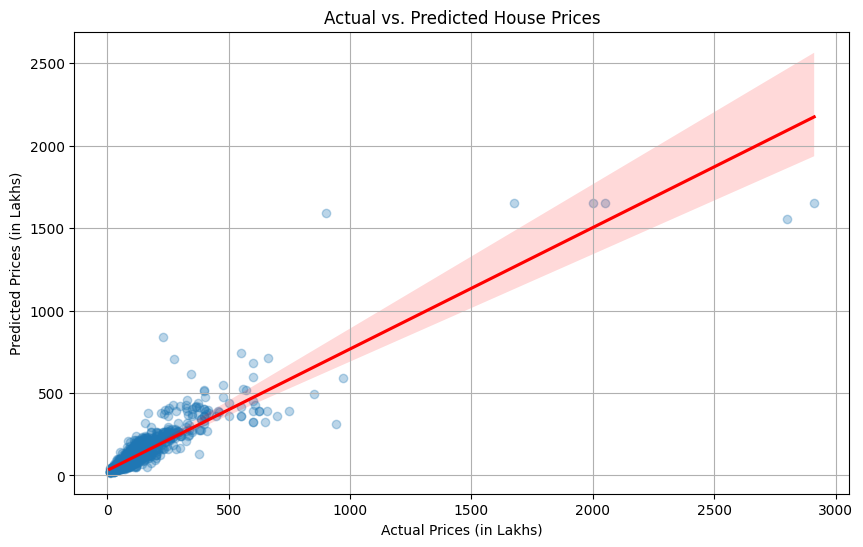

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Actual Prices (in Lakhs)")
plt.ylabel("Predicted Prices (in Lakhs)")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.show()

In [29]:
import pickle
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("Model saved as xgb_model.pkl")

Model saved as xgb_model.pkl
